# City Bike Share Analysis



# # Project Summary

###Problem Statement

###What is the likelihood that a Bike Share program will succeed in the City of Atlanta? 
By using bike share data from other US cities, I want to be able to analyze the popularity and trends of bike shares amongst females and males of different ages. 



## Description of Data and Collection method

CSV Files of Open Dataset for:
*Chicago Q1 & Q2 2015
*Boston 2011 to 2013
*NYC Jan 2015 to Jul 2015

Files Contain:
Gender
Year of Birth
Trip date and time
Duration of Trip

###Transformation and data aggregation description:
I loaded data for Chicago and Boston into a single table (via MS Sql Server Express), where the total volume is ~1.2 M records.In order to conform data to a standard gender code, I updated the gender for each record to "Female" and "Male" values.
The data was then aggregrated by sum of duration , grouped by city,gender and age. The aggregrated data was outputted to a CSV file for use in cross validation and model use.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn import grid_search
%matplotlib inline



In [2]:
dsCity= pd.read_csv('https://raw.githubusercontent.com/Sw3m/Data_Science_GA_Project_15/master/Datasets/CityBikeShareExtract.csv')

In [3]:
dsCity.head()

,City,NumRecords,Gender,Age,AgeRange,YearOfBirth,TotalDur_sec,AvgDur_sec
0,Boston,5,Female,83,75 Years or older,1932,4182,836
1,Boston,2,Female,77,75 Years or older,1938,1457,728
2,Boston,11,Male,77,75 Years or older,1938,7645,695
3,Boston,11,Male,76,75 Years or older,1939,4956,450
4,Boston,16,Male,75,75 Years or older,1940,10131,633


In [4]:
len(dsCity.index)

393

In [5]:
dsBoston = dsCity[dsCity['City']=='Boston']
dsChicago = dsCity[dsCity['City']=='Chicago']
dsNYC= dsCity[dsCity['City']=='NYC']

dsBike


In [6]:
dsCity['Gender']=dsCity.Gender.map({'Female':0,'Male':1})
dsCity['City']=dsCity.City.map({'Boston':0,'Chicago':1,'NYC':2})
dsCity.head()

,City,NumRecords,Gender,Age,AgeRange,YearOfBirth,TotalDur_sec,AvgDur_sec
0,0,5,0,83,75 Years or older,1932,4182,836
1,0,2,0,77,75 Years or older,1938,1457,728
2,0,11,1,77,75 Years or older,1938,7645,695
3,0,11,1,76,75 Years or older,1939,4956,450
4,0,16,1,75,75 Years or older,1940,10131,633


In [12]:
X=dsCity[['TotalDur_sec','Gender','NumRecords']]

Y= dsCity[['Age']]

In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=0.2,random_state=1)

### Perform Linear Regression

In [15]:
linear_rgr =linear_model.LinearRegression()
linear_rgr.fit(X_train,y_train)

print("coefficient {}".format(linear_rgr.coef_))
print("intercept {}".format(linear_rgr.intercept_))
linear_MSE = mean_squared_error(y_test, linear_rgr.predict(X_test))
print('Mean squared error for liner regression: {}'.format(linear_MSE))


coefficient [[ -5.45621348e-07   1.00261465e+01  -5.34915493e-05]]
intercept [ 51.22295292]
Mean squared error for liner regression: 496.202665698


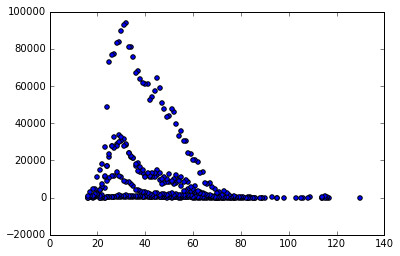

In [25]:
plt.scatter(dsCity['Age'],dsCity['NumRecords'])

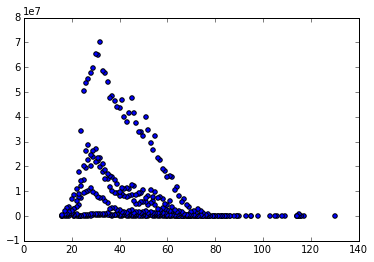

In [26]:
plt.scatter(dsCity['Age'],dsCity['TotalDur_sec'])